In [1]:
from scipy.fftpack import fft, fftshift
import numpy as np
from math import gcd, ceil, floor
import sys
sys.path.append('../software/models/')
from dftModel import dftAnal, dftSynth
from scipy.signal import get_window
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,7)
import IPython.display as ipd  # Import IPython to be able to play the input signal in Part 4
from utilFunctions import wavread, wavwrite
import stft as STFT

In [2]:
# E2 - 1.1: Complete function gen_sine()

def gen_sine(A, f, phi, fs, t):
    """Generate a real sinusoid given its amplitude, frequency, initial phase, sampling rate, and duration.
    
    Args:
        A (float):  amplitude of the sinusoid
        f (float): frequency of the sinusoid in Hz
        phi (float): initial phase of the sinusoid in radians
        fs (float): sampling frequency of the sinusoid in Hz
        t (float): duration of the sinusoid (is second)
        
    Returns:
        np.array: array containing generated sinusoid
        
    """
    ### your code here
    
    num_samples = int(t*fs) #Calculate the total number of samples and cast to int the number of samples
    vector = np.arange(0,num_samples,1) #Generate an array of this length in steps of 1
    x = np.array (vector*f*2*np.pi/fs + phi) #Assign a radiant value to each position 
    y = A * np.cos(x) #Multiply A by the np.cos() function of the radiant values

    return y #Return the variable y
    

In [3]:
#def wavwrite(y, fs, filename):

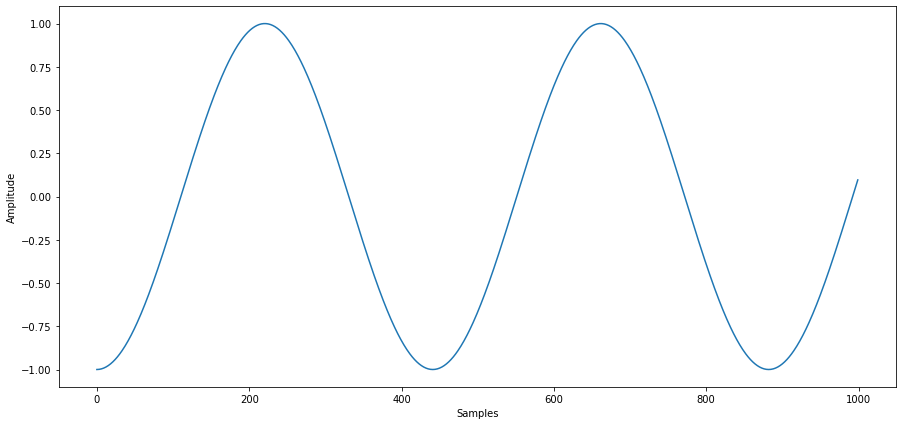

In [4]:

import IPython.display as ipd


y = gen_sine(1.0, 100.0, np.pi, 44100, 5) #Call the gen_sine function with new values
plt.plot(y[:1000]) #Plot the output with new values
plt.xlabel('Samples') #Set X axis lebel as Samples
plt.ylabel('Amplitude') #Set Y axis label as Amplitude
plt.show() 
fs = 44100 
ipd.display(ipd.Audio(data=y, rate=fs)) #Listen the sound

x = get_window('hanning', 220500, fftbins=False)

wavwrite(x*y, fs, "sinus/hanning_window_sinusoid_100.wav")

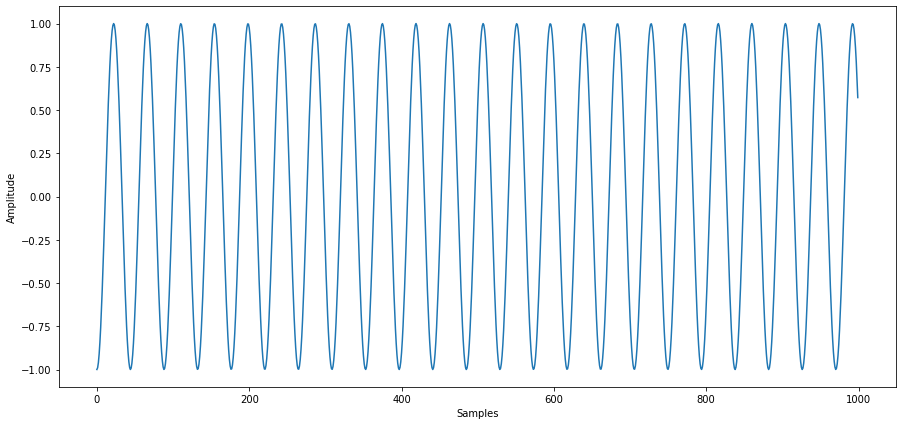

In [29]:
import IPython.display as ipd


y = gen_sine(1.0, 1000.0, np.pi, 44100, 5) #Call the gen_sine function with new values
plt.plot(y[:1000]) #Plot the output with new values
plt.xlabel('Samples') #Set X axis lebel as Samples
plt.ylabel('Amplitude') #Set Y axis label as Amplitude
plt.show() 
fs = 44100 
ipd.display(ipd.Audio(data=y, rate=fs)) #Listen the sound

x = get_window('hanning', 220500, fftbins=False)

wavwrite(x*y, fs, "sinus/hanning_window_sinusoid_1000.wav")

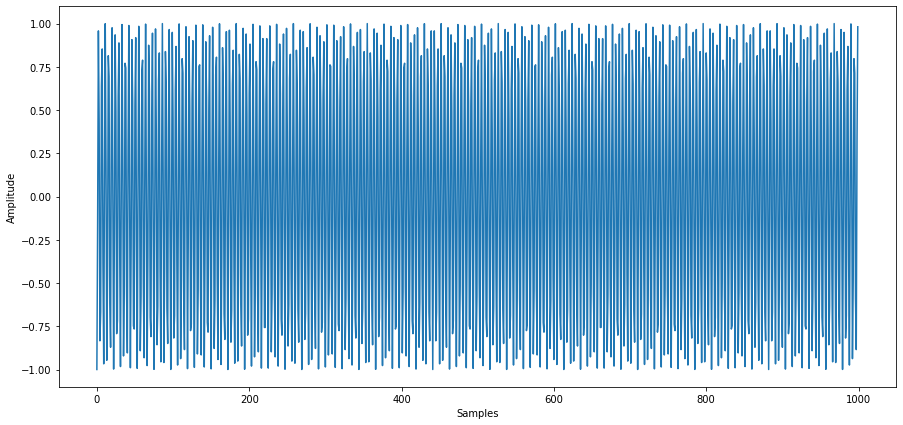

In [30]:
import IPython.display as ipd


y = gen_sine(1.0, 10000.0, np.pi, 44100, 5) #Call the gen_sine function with new values
plt.plot(y[:1000]) #Plot the output with new values
plt.xlabel('Samples') #Set X axis lebel as Samples
plt.ylabel('Amplitude') #Set Y axis label as Amplitude
plt.show() 
fs = 44100 
ipd.display(ipd.Audio(data=y, rate=fs)) #Listen the sound

x = get_window('hanning', 220500, fftbins=False)

wavwrite(x*y, fs, "sinus/hanning_window_sinusoid_10000.wav")

In [3]:
#aqui normalitzo les trs senyals

fs, sinus100   = wavread("sinus/hanning_window_sinusoid_100.wav")
fs, sinus1000  = wavread("sinus/hanning_window_sinusoid_1000.wav")
fs, sinus10000 = wavread("sinus/hanning_window_sinusoid_10000.wav")
fs, waveNet100   = wavread("sinus/wavenet_100.wav")
fs, waveNet1000  = wavread("sinus/waveNet_1000.wav")
fs, waveNet10000 = wavread("sinus/waveNet_10000.wav")
fs, TS_100  = wavread("sinus/TS_101.wav")
fs, TS_1000  = wavread("sinus/TS_1001.wav")
fs, TS_10000 = wavread("sinus/TS_10001.wav")



../software/models/utilFunctions.py:52: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = read(filename)


ERROR! Session/line number was not unique in database. History logging moved to new session 181


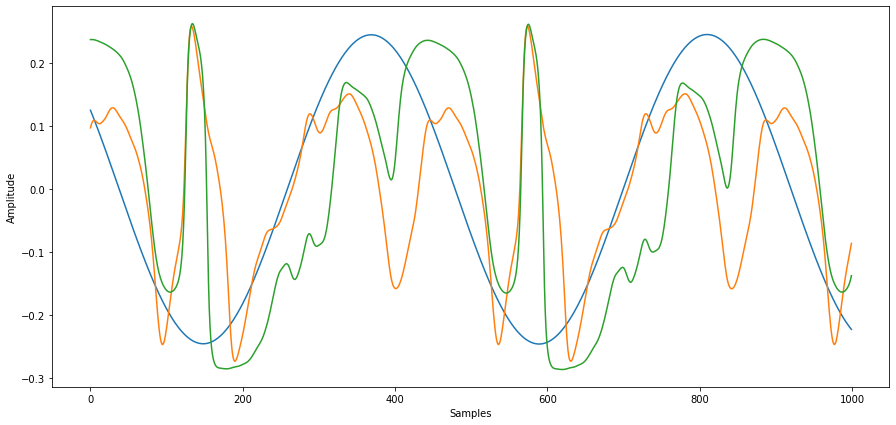

In [32]:


#plt.plot(0.26*sinus100[100300:101300]) # blue
ax1 = -1.15*waveNet100[100130:101130]
ax2 = TS_100[100650:101650]

plt.plot(0.25*sinus100[100400:101400])
plt.plot(-1.18*waveNet100[100030:101030]) # blue
plt.plot(TS_100[100055:101055])          # orange

plt.xlabel('Samples') #Set X axis lebel as Samples
plt.ylabel('Amplitude') #Set Y axis label as Amplitude
plt.show() 
ipd.display(ipd.Audio(data=TS_100, rate=fs)) #Listen the sound



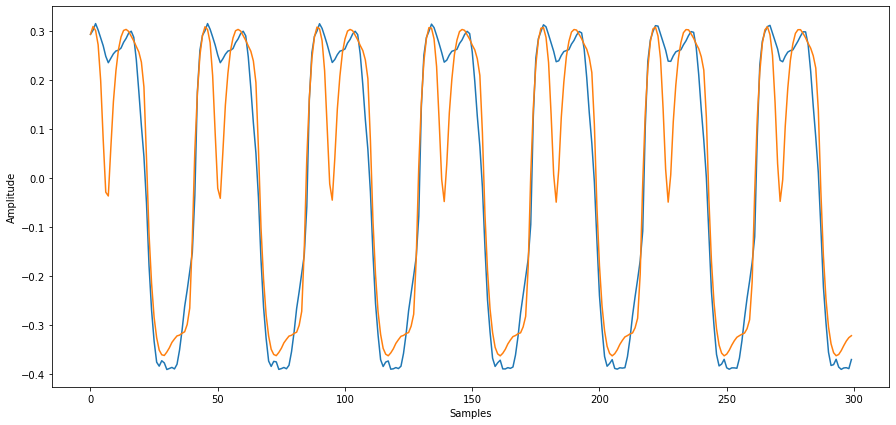

In [18]:
#plt.plot(0.26*sinus100[100300:101300]) # blue

plt.plot(2*waveNet1000[100030:100330]) # blue
plt.plot(TS_1000[100000:100300])          # orange

plt.xlabel('Samples') #Set X axis lebel as Samples
plt.ylabel('Amplitude') #Set Y axis label as Amplitude
plt.show() 
ipd.display(ipd.Audio(data=TS_100, rate=fs)) #Listen the sound


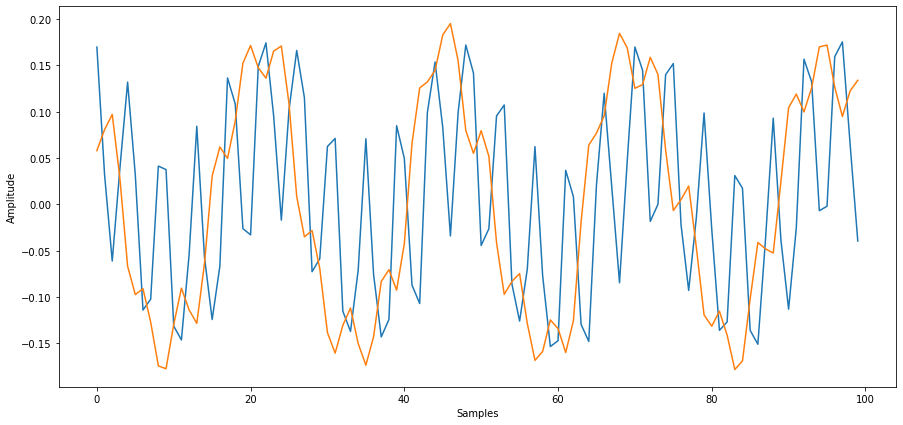

In [128]:
#plt.plot(0.26*sinus100[100300:101300]) # blue

plt.plot(-1.1*waveNet10000[100030:100130]) # blue
plt.plot(TS_10000[100000:100100])          # orange

plt.xlabel('Samples') #Set X axis lebel as Samples
plt.ylabel('Amplitude') #Set Y axis label as Amplitude
plt.show() 
ipd.display(ipd.Audio(data=TS_100, rate=fs)) #Listen the sound


In [ ]:
# Here Ill find the ESR of the two fragments

1631700
1631700


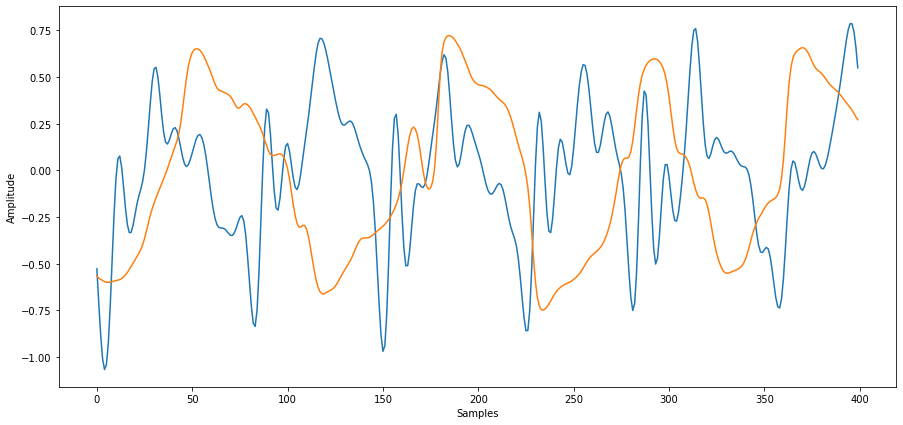

In [10]:
fs, ts_short   = wavread("sinus/TS_short_mono.wav")
fs, vavenet_short = wavread("sinus/processed_short_mono.wav")


N = len(vavenet_short)
print (N)

plt.plot(2*ts_short[100000:100400]) # blue
plt.plot(vavenet_short[100000:100400])          # orange

plt.xlabel('Samples') #Set X axis lebel as Samples
plt.ylabel('Amplitude') #Set Y axis label as Amplitude
plt.show() 

for i in N:
    ESR = sum((ts_short[i] - vavenet_short[i]^2))
    ESR = 

In [20]:
def dft(x):
    """Compute the DFT of a signal.
    
    Args:
        x (numpy array): input sequence of length N
        
    Returns:
        np.array: N point DFT of the input sequence x
    """
    ## Your code here
    N = len(x) #Determine the length of the DFT based on the length of x
    X = np.array([]) #Generate an empty array X
    for k in range (N): #For loop to calculate a value for each k
        s = np.exp(1j* 2 * np.pi * k/ N * np.arange(N)) #Generate an array of complex exponentials
        X = np.append(X, sum(x*np.conjugate(s))) # Multiply and sum each exponential conjugated to x, 
                                                 # add it to the previous calculated X values
    return X #Return all the sums in an array

In [5]:
# E3 - 4.1: Complete the function zp_fft_size_expt()

def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

1631700
1631700


/Users/miquel/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/miquel/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


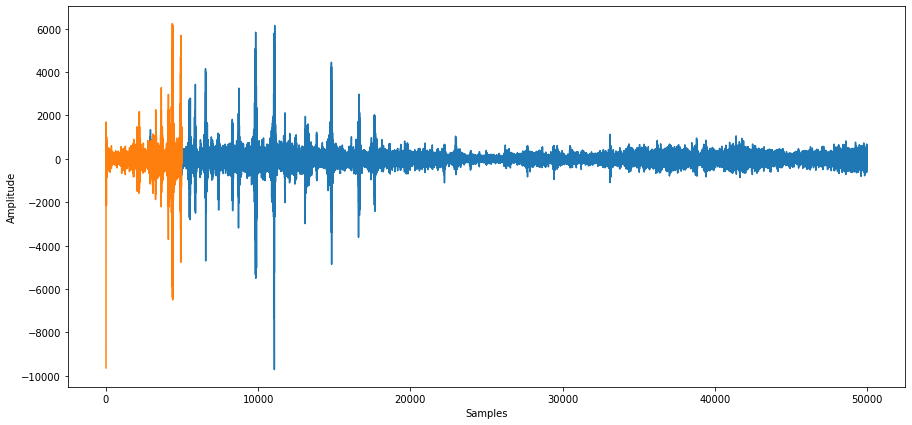

In [19]:
# E4 - 3.2: Call the function compute_eng_env() and plot the envelopes together with the spectrogram of the signal
### Test case 1
# Assign the values for constants 'M', 'N' and 'H' 


#plt.plot(0.26*sinus100[100300:101300]) # blue

fs, ts_short   = wavread("sinus/TS_short_mono.wav")
fs, vavenet_short = wavread("sinus/processed_short_mono.wav")


TS = FFT(ts_short[:1048576])
WavNet = FFT(vavenet_short[:1048576])
print(len(ts_short))
print(len(vavenet_short))
plt.plot(TS[:50000]) # blue
plt.plot(WavNet[:5000]) # blue

#plt.plot(TS_1000[100000:100300])          # orange

plt.xlabel('Samples') #Set X axis lebel as Samples
plt.ylabel('Amplitude') #Set Y axis label as Amplitude
plt.show() 
ipd.display(ipd.Audio(data=TS_100, rate=fs)) #Listen the sound

/Users/miquel/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


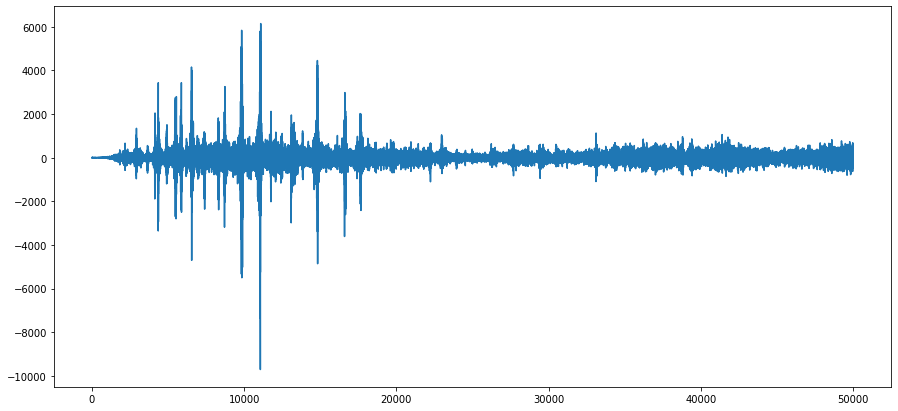

/Users/miquel/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


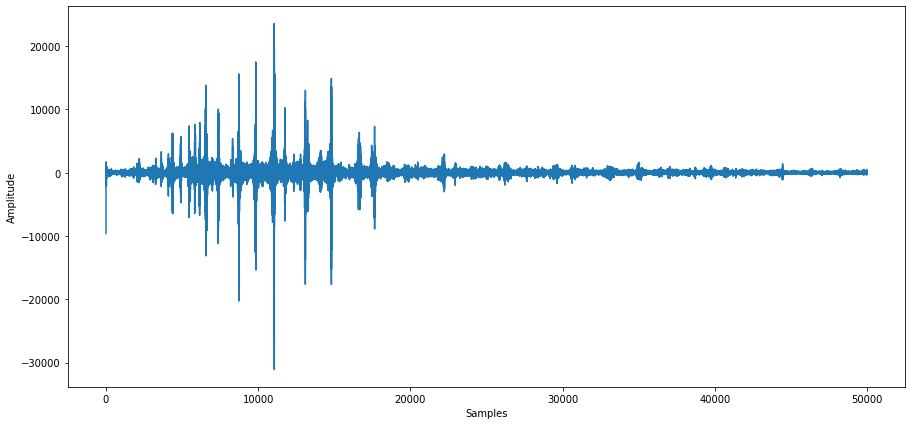

In [22]:
plt.plot(TS[:50000]) # blue
plt.show()
plt.plot(WavNet[:50000]) # blue

plt.xlabel('Samples') #Set X axis lebel as Samples
plt.ylabel('Amplitude') #Set Y axis label as Amplitude
plt.show() 
ipd.display(ipd.Audio(data=TS_100, rate=fs)) #Listen the sound

../software/models/utilFunctions.py:52: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = read(filename)


264600
220500


/Users/miquel/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


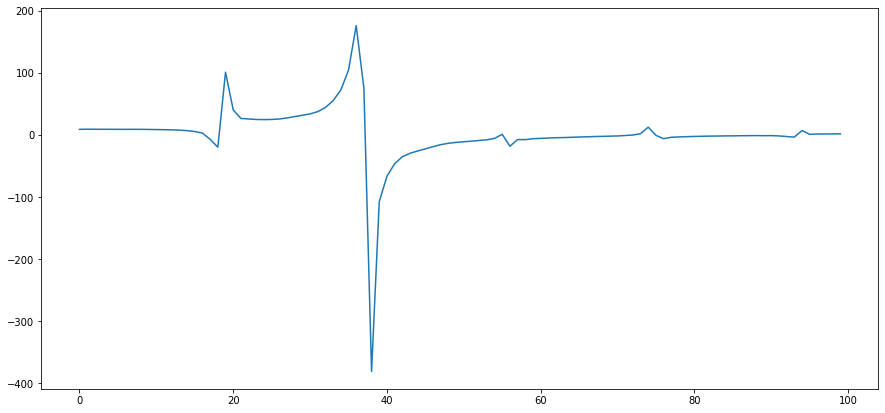

/Users/miquel/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


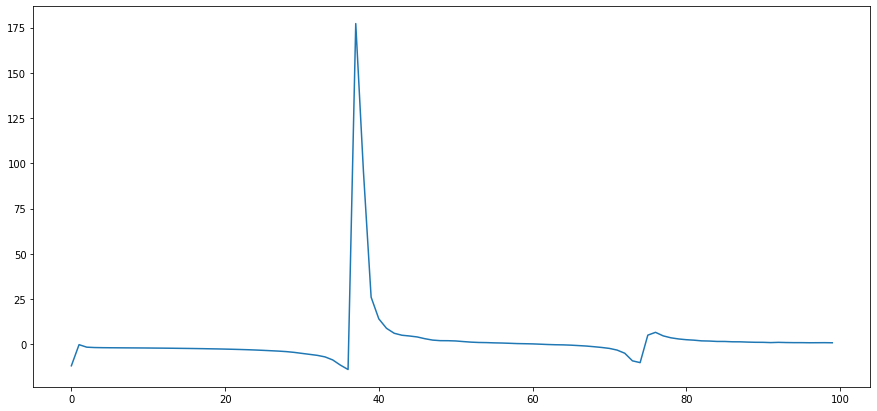

In [30]:
fs, sinus100   = wavread("sinus/hanning_window_sinusoid_100.wav")
fs, sinus1000  = wavread("sinus/hanning_window_sinusoid_1000.wav")
fs, sinus10000 = wavread("sinus/hanning_window_sinusoid_10000.wav")
fs, waveNet100   = wavread("sinus/wavenet_100.wav")
fs, waveNet1000  = wavread("sinus/waveNet_1000.wav")
fs, waveNet10000 = wavread("sinus/waveNet_10000.wav")
fs, TS_100  = wavread("sinus/TS_101.wav")
fs, TS_1000  = wavread("sinus/TS_1001.wav")
fs, TS_10000 = wavread("sinus/TS_10001.wav")


print(len(waveNet100))
print(len(TS_100))

TS = FFT(waveNet100[:16384])
WavNet = FFT(TS_100[:16384])

plt.plot(WavNet[:100]) # blue
plt.show()
plt.plot(TS[:100]) # blue